## Load and read data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.preprocessing import (
    OneHotEncoder, 
    KBinsDiscretizer, 
    FunctionTransformer,
    MinMaxScaler,
)

### Univariate Graphs

In [14]:
agg_df = pd.read_csv('agg_df.csv')

In [15]:
df = pd.read_csv('application_train.csv')

In [16]:
df = df['TARGET']

In [17]:
df = pd.concat([pd.DataFrame(agg_df), df], axis=1)

In [18]:
df

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,TARGET
0,3951.000000,24835.5,23787.0,24835.500000,1.0
1,9251.775000,179055.0,179055.0,179055.000000,0.0
2,98356.995000,900000.0,1035882.0,900000.000000,0.0
3,5357.250000,24282.0,20106.0,24282.000000,0.0
4,14231.100868,0.0,0.0,181829.101051,0.0
...,...,...,...,...,...
338852,6605.910000,40455.0,40455.0,40455.000000,NaN
338853,10074.465000,57595.5,56821.5,57595.500000,NaN
338854,5567.715000,28912.5,27306.0,28912.500000,NaN
338855,19065.825000,223789.5,247423.5,223789.500000,NaN


In [7]:
#from sklearn.preprocessing import MinMaxScaler

In [8]:
#col_scale =['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']

In [9]:
#minmax_scaler = MinMaxScaler()

#agg_df_scaled = minmax_scaler.fit_transform(df[col_scale])

In [10]:
#df = np.concatenate([agg_df_scaled, df], axis=1)

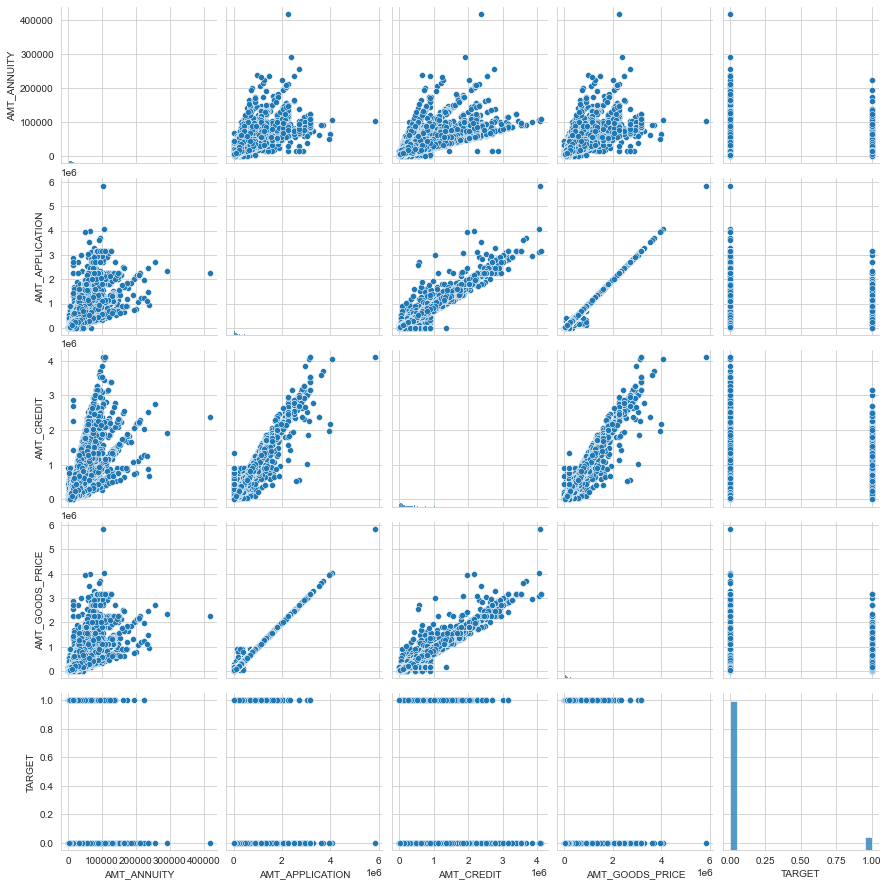

In [24]:
sns.pairplot(df)

In [37]:
df.corr()[['TARGET']].sort_values(by='TARGET', ascending=False)

,TARGET
TARGET,1.000000
AMT_GOODS_PRICE,0.001055
AMT_APPLICATION,0.000590
AMT_CREDIT,0.000589
AMT_ANNUITY,-0.000387


In [66]:
#plt.figure(figsize=(8, 12))
#heatmap = sns.heatmap(df.corr()[['TARGET']].sort_values(by='TARGET', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('Features Correlating with TARGET', fontdict={'fontsize':18}, pad=16);

In [76]:
from sklearn.preprocessing import (
    KBinsDiscretizer,
)
import numpy as np
import matplotlib.pyplot as plt

def univariate_graph(data, var,  **kwargs):
    '''
    This function takes at least a dataset and a variable name of the dataset. The variable name should be the feature you are looking at.
    It then groups by the variable values and calculates the amount of observations in the variable's categories and the percentage of 
    defaults in each category. If your variable is not categorical, it takes on an extra argument, n_bins, to make it categorical. Also 
    specify the strategy argument for the KBinsDiscretizer.
    The outcome of the variable is a plot that shows the amount of observations in each bucket as bars and the share of defaults as a line.
    '''
    df = data[['TARGET', var]].dropna().copy().reset_index(drop = True)
    if type(df[var][0]) == str:
        df = df.groupby(var).agg({
            'TARGET' : [np.mean, len], 
            })
    else:
        df[var] = KBinsDiscretizer(**kwargs, 
                                   encode = 'ordinal'
                                  ).fit_transform(df[[var]])
        df[var] = [str(d) for d in df[var]]
        df = df.groupby(var).agg({
            'TARGET' : [np.mean, len],
            })
        
#     make graph
    fig, ax1 = plt.subplots()
    ax1.set_title(var.replace('_', ' '))
#     bar plot
    ax1.tick_params(axis = 'x', 
                    rotation = 45,
                   )
    ax1.set_ylabel('Anzahl', 
                   color = 'blue',
                  )
    ax1.bar(list(df.index),
            list(df['TARGET']['len']),
            label = 'Anzahl',
            color = 'blue',
            )
    ax1.tick_params(axis = 'y', 
                    labelcolor = 'blue',
                   ) 
#     line graph
    ax2 = ax1.twinx() 
    ax2.set_ylabel('Ausfallquote', 
                   color = 'red',
                   ) 
    ax2.plot(df['TARGET']['mean'],
             label = 'Ausfallquote', 
             color = 'red',
             ) 
    ax2.tick_params(axis = 'y', 
                    labelcolor = 'red') 
#     save figure
    #plt.savefig(path+var+'.png')
#     show plot
    # plt.show() 


#if __name__ == '__main__':
   # univariate_graph(data_containing_var_and_TARGET, 'NAME_EDUCATION_TYPE')

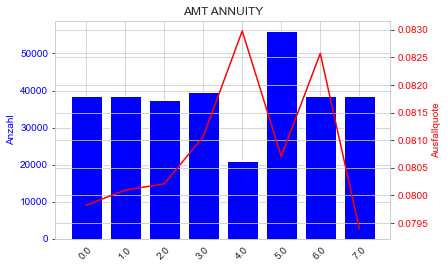

In [79]:
univariate_graph(df, 'AMT_ANNUITY', n_bins=8)

In [ ]:
#within the first 4 buckets the default rate is gradually insreasing and if the amount of payment decreased the rate of defaul is high


In [56]:
# The leftmost and rightmost bin edges
first_edge, last_edge = df['AMT_ANNUITY'].min(), df['AMT_ANNUITY'].max()

n_equal_bins = 10  # NumPy's default
bin_edges = np.linspace(start=first_edge, stop=last_edge, num=n_equal_bins + 1, endpoint=True)
bin_edges

array([     0.    ,  41792.7645,  83585.529 , 125378.2935, 167171.058 ,
       208963.8225, 250756.587 , 292549.3515, 334342.116 , 376134.8805,
       417927.645 ])

C:\Users\Sey\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


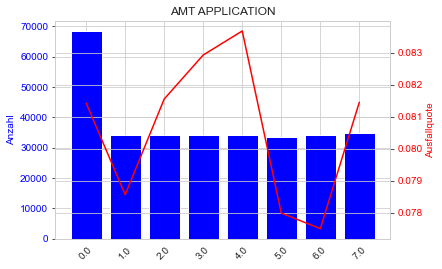

In [67]:
univariate_graph(df, 'AMT_APPLICATION', n_bins = 9)

In [57]:
# The leftmost and rightmost bin edges
first_edge, last_edge = df['AMT_APPLICATION'].min(), df['AMT_APPLICATION'].max()

n_equal_bins = 10  # NumPy's default
bin_edges = np.linspace(start=first_edge, stop=last_edge, num=n_equal_bins + 1, endpoint=True)
bin_edges

array([      0.,  585000., 1170000., 1755000., 2340000., 2925000.,
       3510000., 4095000., 4680000., 5265000., 5850000.])

C:\Users\Sey\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


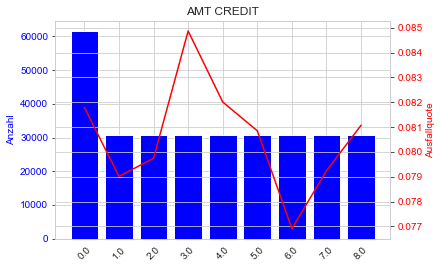

In [22]:
univariate_graph(df, 'AMT_CREDIT', n_bins = 10) 

In [58]:
# The leftmost and rightmost bin edges
first_edge, last_edge = df['AMT_CREDIT'].min(), df['AMT_CREDIT'].max()

n_equal_bins = 10  # NumPy's default
bin_edges = np.linspace(start=first_edge, stop=last_edge, num=n_equal_bins + 1, endpoint=True)
bin_edges

array([      0. ,  410435.1,  820870.2, 1231305.3, 1641740.4, 2052175.5,
       2462610.6, 2873045.7, 3283480.8, 3693915.9, 4104351. ])

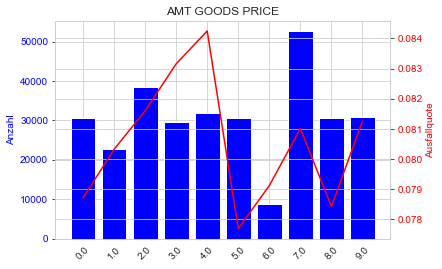

In [23]:
univariate_graph(df, 'AMT_GOODS_PRICE', n_bins = 10)

In [59]:
# The leftmost and rightmost bin edges
first_edge, last_edge = df['AMT_GOODS_PRICE'].min(), df['AMT_GOODS_PRICE'].max()

n_equal_bins = 10  # NumPy's default
bin_edges = np.linspace(start=first_edge, stop=last_edge, num=n_equal_bins + 1, endpoint=True)
bin_edges

array([      0.,  585000., 1170000., 1755000., 2340000., 2925000.,
       3510000., 4095000., 4680000., 5265000., 5850000.])

In [ ]:
def plot_hist(var):
    plt.figure(figsize=(15,5))
    plt.hist(df[var], bins=50)
    plt.xticks(rotation=90)
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(var))
    plt.show()
    
for n in agg_df:
    plot_hist(n)